In [5]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data = pd.read_csv(r"C:\Users\RITIKA\Downloads\archive\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
data['Churn'] = data['Churn'].replace({'No': 0, 'Yes': 1})

C:\Users\RITIKA\AppData\Local\Temp\ipykernel_8396\52105173.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Churn'] = data['Churn'].replace({'No': 0, 'Yes': 1})


In [10]:
data.shape

(7043, 21)

In [12]:
X = data.iloc[:,1:20]
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [14]:
y= data.iloc[:,20]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [16]:
data_new = X[['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']]

object_columns = data_new.select_dtypes(include='object').columns.tolist()
object_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [18]:
data_encoded = pd.get_dummies(X, columns=object_columns, drop_first=False)
data_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.5,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.5,False,True,False,True,False,True,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,7362.9,True,False,False,True,False,True,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,346.45,True,False,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
7041,1,4,74.40,306.6,False,True,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True


In [20]:
data_encoded.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [22]:
data_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.5,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.5,False,True,False,True,False,True,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,7362.9,True,False,False,True,False,True,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,346.45,True,False,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
7041,1,4,74.40,306.6,False,True,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True


In [26]:
data_encoded['TotalCharges'] = pd.to_numeric(data_encoded['TotalCharges'], errors='coerce')

In [28]:
data_encoded= data_encoded.replace({True:1,False:0})
data_encoded

C:\Users\RITIKA\AppData\Local\Temp\ipykernel_8396\3443448264.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded= data_encoded.replace({True:1,False:0})


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [30]:
data_encoded.dropna(how='all')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_encoded,y,test_size=0.2,random_state=0)


In [34]:
X_train = X_train.fillna(0)
y_train = y_train.fillna(0)

In [36]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2920,0,72,85.10,6155.40,1,0,0,1,1,0,...,1,0,0,1,1,0,0,0,0,1
2966,1,14,46.35,672.70,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
6099,0,71,24.70,1810.55,1,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
5482,0,33,73.90,2405.05,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
2012,0,47,98.75,4533.70,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,15,103.45,1539.80,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
3264,0,10,91.10,964.35,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1653,0,58,20.75,1185.95,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
2607,1,1,69.75,69.75,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [40]:
X_test

array([[-0.44053127, -0.54470796, -0.20770528, ..., -0.55083823,
         1.41572045, -0.5289099 ],
       [-0.44053127,  1.12863606,  1.72647082, ...,  1.81541502,
        -0.70635414, -0.5289099 ],
       [-0.44053127, -0.78958758,  0.24768721, ..., -0.55083823,
         1.41572045, -0.5289099 ],
       ...,
       [ 2.26998644,  0.96538298,  1.57246536, ..., -0.55083823,
         1.41572045, -0.5289099 ],
       [-0.44053127, -0.58552123, -0.27228822, ..., -0.55083823,
        -0.70635414,  1.89068118],
       [-0.44053127, -1.2793468 , -0.61838651, ..., -0.55083823,
        -0.70635414,  1.89068118]])

In [42]:
X_train.shape

(5634, 45)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU
from tensorflow.keras.layers import Dropout

In [46]:
classifier = Sequential()
classifier.add(Dense(units=45,activation='relu'))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dropout(0.3))

In [48]:
classifier.add(Dense(units = 44,activation='relu'))

In [50]:
classifier.add(Dense(units=1,activation="sigmoid"))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [54]:
model_history = classifier.fit(X_train,y_train,validation_split = 0.33, batch_size=10,epochs=1000,callbacks=early_stopping)


Epoch 1/1000
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7581 - loss: 0.4830 - val_accuracy: 0.8102 - val_loss: 0.4095
Epoch 2/1000
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7856 - loss: 0.4371 - val_accuracy: 0.8102 - val_loss: 0.4103


In [56]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

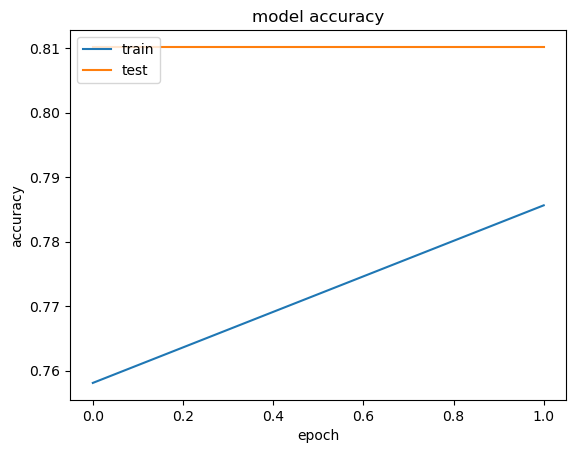

In [58]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


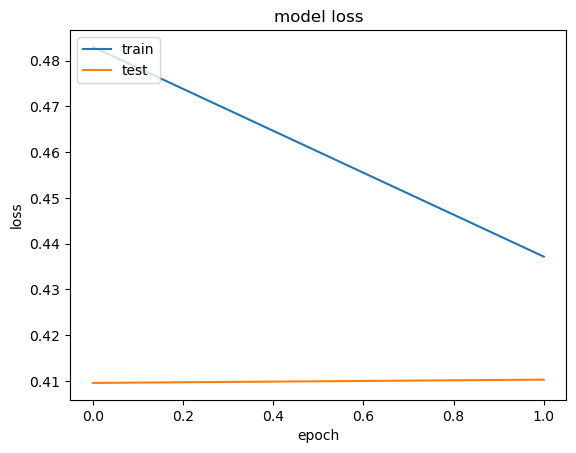

In [60]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
y_pred = classifier.predict(X_test)
y_pred

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.07819447],
       [0.16816114],
       [0.28606242],
       ...,
       [0.34588093],
       [0.15339884],
       [0.3998805 ]], dtype=float32)

In [64]:
y_pred = (y_pred >=0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[960,  81],
       [221, 147]], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.7856635911994322

In [70]:
classifier.get_weights()

[array([[ 0.15890254, -0.24937142,  0.12989847, ...,  0.1324422 ,
          0.01567721,  0.22239493],
        [ 0.12551033,  0.06936667,  0.33419353, ..., -0.09264094,
         -0.01834919,  0.16489711],
        [-0.2500205 , -0.13331954, -0.18107131, ...,  0.18556578,
          0.15037005,  0.12925117],
        ...,
        [-0.07058977, -0.02631559, -0.04758989, ..., -0.22858131,
         -0.14390728,  0.06392612],
        [-0.08150477, -0.12635478,  0.10410903, ..., -0.09172044,
          0.16020739, -0.10945336],
        [ 0.16933332,  0.10680186,  0.18645382, ..., -0.09272779,
          0.14596821, -0.19043732]], dtype=float32),
 array([ 0.0184173 ,  0.06947935,  0.0178918 ,  0.01184058, -0.01839925,
         0.03059764, -0.0203793 ,  0.02166492,  0.01930644, -0.04806048,
        -0.00639358, -0.00497379,  0.00052793,  0.00975395, -0.00491836,
        -0.00281209, -0.02071826, -0.00921951,  0.00204697, -0.05363917,
         0.05323273, -0.0151739 , -0.00856987, -0.0119113 , -0.059